In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

/home/bruno/miniconda3/envs/musicgen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("google/MusicCaps")
df_train = ds['train'].to_pandas()
df_train = df_train.drop(columns=['start_s', 'end_s', 'audioset_positive_labels', 'author_id', 'is_balanced_subset', 'is_audioset_eval'])
df_train

,ytid,aspect_list,caption
0,-0Gj8-vB1q4,"['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...
1,-0SdAVK79lg,"['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...
2,-0vPFx-wRRI,"['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...
3,-0xzrMun0Rs,"['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...
4,-1LrH01Ei1w,"['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...
...,...,...,...
5516,zw5dkiklbhE,"['amateur recording', 'percussion', 'wooden bo...",This audio contains someone playing a wooden b...
5517,zwfo7wnXdjs,"['instrumental music', 'arabic music', 'genera...",The song is an instrumental. The song is mediu...
5518,zx_vcwOsDO4,"['instrumental', 'no voice', 'electric guitar'...",The rock music is purely instrumental and feat...
5519,zyXa2tdBTGc,"['instrumental music', 'gospel music', 'strong...",The song is an instrumental. The song is slow ...


## Definicje konceptów

In [3]:
music_genres = [
    "pop",
    "rock",
    "jazz",
    "classical",
    "hip-hop",
    "country",
    "electronic",
    "reggae",
    "blues",
    "folk",
    "r&b",
    "metal",
    "punk",
    "soul",
    "gospel",
    "latin",
    "reggaeton",
    "disco",
    "indie",
    "alternative",
    "house",
    "techno",
    "trance",
    "dubstep",
    "ambient",
    "new age",
    "bluegrass",
    "grunge",
    "emo",
    "post-rock",
    "post-punk",
    "shoegaze",
    "industrial",
    "experimental",
    "noise",
    "synthwave",
    "chillwave",
    "lo-fi",
    "acoustic",
    "instrumental",
    "soundtrack",
    "world",
    "funk",
    "swing",
    "bossa nova",
    "k-pop",
    "j-pop",
    "c-pop",
    "t-pop",
    "amapiano",
    "afrobeats",
    "dancehall",
    "trap",
    "grime",
    "drum and bass",
    "dub",
    "salsa",
]

In [4]:
instruments = [
    "guitar",
    "piano",
    "drums",
    "bass",
    "strings",
    "voice",
    "keyboard",
    "synth",
    "violin",
    "saxophone",
    "choir",
    "trumpet",
    "flute",
    "clarinet",
    "trombone",
    "cello",
    "harp",
    "accordion",
    "synthesizer",
    "turntables",
    "theremin",
    "ukulele",
    "banjo",
    "mandolin",
    "marimba",
    "percussion",
    "harmonica",
    "didgeridoo",
    "bagpipes",
    "sitar",
    "tabla",
    "hats",
    "kick",
    "snare",
    "tom",
    "djembe",
    "bongos",
    "conga",
    "timbales",
    "steel drum",
    "kalimba",
    "zither",
    "ocarina",
    "bassoon",
    "oboe",
    "horn",
]

In [5]:
emotions = [
    "happy",
    "sad",
    "angry",
    "relaxed",
    "excited",
    "nostalgic",
    "romantic",
    "melancholic",
    "energetic",
    "calm",
    "mysterious",
    "joyful",
    "hopeful",
    "intense",
    "peaceful",
    "reflective",
    "playful",
    "dramatic",
    "eerie",
    "triumphant",
    "depressed",
    "anxious",
    "confident",
    "powerful",
    "moody",
]

## Przygotowanie zbioru danych

- Aby przeprowadzić analizę będę rozważać wpływ 2 rodzajów konceptów: emocji i instrumentów na generację danego gatunku muzyki.
- W tym celu przygotuję zmodyfikowane opisy utworów, nie zawierające opisów gatunków muzycznych, przy okazji oznaczajac który opis odnosi się do jakiego gatunku.
- Dodatkowo muszę oznaczyć zawieranie się danego konceptu w danym opisie.

In [6]:
def transform_concept(df, concept_list, concept_name):
    _df = df.copy()
    for concept in concept_list:
        _df[f"is_{concept_name}_" + concept] = _df['caption'].str.contains(concept, case=False).astype(int)
    return _df

def remove_concept(df, concept_list, concept_name):
    _df = df.copy()
    _df[f"caption_without_{concept_name}"] = _df['caption']
    for concept in concept_list:
        _df[f"caption_without_{concept_name}"] = _df[f"caption_without_{concept_name}"].str.replace(concept, '', case=False)
    _df[f"caption_without_{concept_name}"] = _df[f"caption_without_{concept_name}"].str.replace('  ', ' ')
    _df[f"caption_without_{concept_name}"] = _df[f"caption_without_{concept_name}"].str.strip()
    return _df

In [7]:
df_train_transformed = transform_concept(df_train, music_genres, "genre")
df_train_transformed = transform_concept(df_train_transformed, instruments, "instrument")
df_train_transformed = transform_concept(df_train_transformed, emotions, "emotion")

df_train_transformed = remove_concept(df_train_transformed, music_genres, "genre")
df_train_transformed

,ytid,aspect_list,caption,is_genre_pop,is_genre_rock,is_genre_jazz,is_genre_classical,is_genre_hip-hop,is_genre_country,is_genre_electronic,...,is_emotion_playful,is_emotion_dramatic,is_emotion_eerie,is_emotion_triumphant,is_emotion_depressed,is_emotion_anxious,is_emotion_confident,is_emotion_powerful,is_emotion_moody,caption_without_genre
0,-0Gj8-vB1q4,"['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The low quality recording features a ballad so...
1,-0SdAVK79lg,"['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This song features an electric guitar as the m...
2,-0vPFx-wRRI,"['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,a male voice is singing a melody with changing...
3,-0xzrMun0Rs,"['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This song contains digital drums playing a sim...
4,-1LrH01Ei1w,"['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This song features a rubber instrument being p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,zw5dkiklbhE,"['amateur recording', 'percussion', 'wooden bo...",This audio contains someone playing a wooden b...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This audio contains someone playing a wooden b...
5517,zwfo7wnXdjs,"['instrumental music', 'arabic music', 'genera...",The song is an instrumental. The song is mediu...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The song is an . The song is medium tempo with...
5518,zx_vcwOsDO4,"['instrumental', 'no voice', 'electric guitar'...",The rock music is purely instrumental and feat...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The music is purely and features an electric g...
5519,zyXa2tdBTGc,"['instrumental music', 'gospel music', 'strong...",The song is an instrumental. The song is slow ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The song is an . The song is slow tempo with a...


### Zbiory zawierające chociaż jeden z konceptów i gatunek

In [8]:
is_any_genre = df_train_transformed.filter(like='is_genre_').sum(axis=1) > 0
is_any_instrument = df_train_transformed.filter(like='is_instrument_').sum(axis=1) > 0
is_any_emotion = df_train_transformed.filter(like='is_emotion_').sum(axis=1) > 0

df_train_transformed_intrument = df_train_transformed[is_any_genre & is_any_instrument]
df_train_transformed_emotion = df_train_transformed[is_any_genre & is_any_emotion]

display(df_train_transformed_intrument)
display(df_train_transformed_emotion)

,ytid,aspect_list,caption,is_genre_pop,is_genre_rock,is_genre_jazz,is_genre_classical,is_genre_hip-hop,is_genre_country,is_genre_electronic,...,is_emotion_playful,is_emotion_dramatic,is_emotion_eerie,is_emotion_triumphant,is_emotion_depressed,is_emotion_anxious,is_emotion_confident,is_emotion_powerful,is_emotion_moody,caption_without_genre
0,-0Gj8-vB1q4,"['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The low quality recording features a ballad so...
4,-1LrH01Ei1w,"['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This song features a rubber instrument being p...
5,-1OlgJWehn8,"['instrumental', 'white noise', 'female vocali...",This clip is three tracks playing consecutivel...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This clip is three tracks playing consecutivel...
6,-1UWSisR2zo,"['live performance', 'poor audio quality', 'am...",A male singer sings this groovy melody. The so...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A male singer sings this groovy melody. The so...
8,-4NLarMj4xU,"['pop', 'tinny wide hi hats', 'mellow piano me...",The Pop song features a soft female vocal sing...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The song features a soft female vocal singing ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,zu_1zpF--Zg,"['amateur recording', 'jazz/bossa-nova', 'upri...",This audio contains someone playing jazz chord...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This audio contains someone playing chords and...
5517,zwfo7wnXdjs,"['instrumental music', 'arabic music', 'genera...",The song is an instrumental. The song is mediu...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The song is an . The song is medium tempo with...
5518,zx_vcwOsDO4,"['instrumental', 'no voice', 'electric guitar'...",The rock music is purely instrumental and feat...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The music is purely and features an electric g...
5519,zyXa2tdBTGc,"['instrumental music', 'gospel music', 'strong...",The song is an instrumental. The song is slow ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The song is an . The song is slow tempo with a...


,ytid,aspect_list,caption,is_genre_pop,is_genre_rock,is_genre_jazz,is_genre_classical,is_genre_hip-hop,is_genre_country,is_genre_electronic,...,is_emotion_playful,is_emotion_dramatic,is_emotion_eerie,is_emotion_triumphant,is_emotion_depressed,is_emotion_anxious,is_emotion_confident,is_emotion_powerful,is_emotion_moody,caption_without_genre
0,-0Gj8-vB1q4,"['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The low quality recording features a ballad so...
8,-4NLarMj4xU,"['pop', 'tinny wide hi hats', 'mellow piano me...",The Pop song features a soft female vocal sing...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The song features a soft female vocal singing ...
21,-BHPu-dPmWQ,"['intimate wide mixed vocals', 'synth lead mel...",The Alternative/Indie song features an intimat...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The / song features an intimate, widely spread..."
22,-BIMKnb3tlo,"['hindustani classical music', 'harmonium', 'b...",This is a Hindustani classical music piece. Th...,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,This is a Hindustani music piece. There is a h...
24,-ByoSbgzr4M,"['instrumental', 'electric guitar', 'stringed ...",This clip is an electronic guitar instrumental...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,This clip is an guitar . The tempo is fast wit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,zeUEOxTd8IE,"['k-pop', 'boy band', 'male vocals', 'rap-like...",This is a K-pop music piece performed by a boy...,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,This is a K- music piece performed by a boy ba...
5504,zixIuxzCCvs,"['heavy metal', 'live performance', 'male voca...",This is the live recording of a heavy metal mu...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,This is the live recording of a heavy music pi...
5505,zj2G-KVw4N4,"['accordion music', 'tuba', 'acoustic guitar',...",This waltz song features accordions playing in...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This waltz song features accordions playing in...
5507,zjsWFvUkh7M,"['male vocalist', 'medium tempo', 'spirited',...",A male vocalist sings this energetic song. The...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A male vocalist sings this energetic song. The...


### Analiza liczności zbiorów

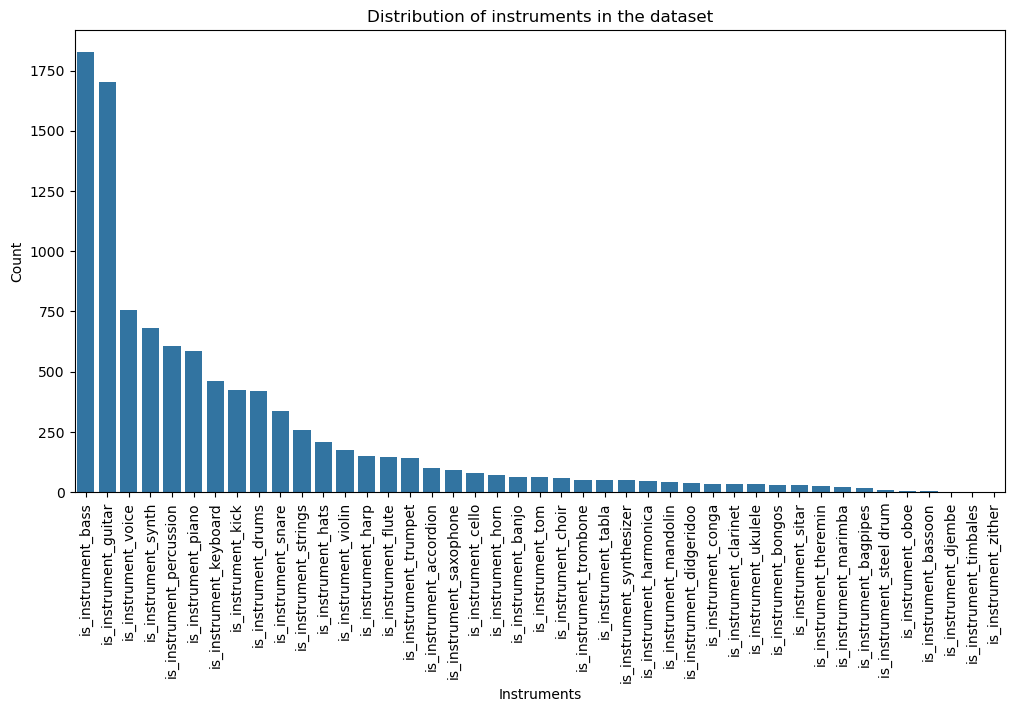

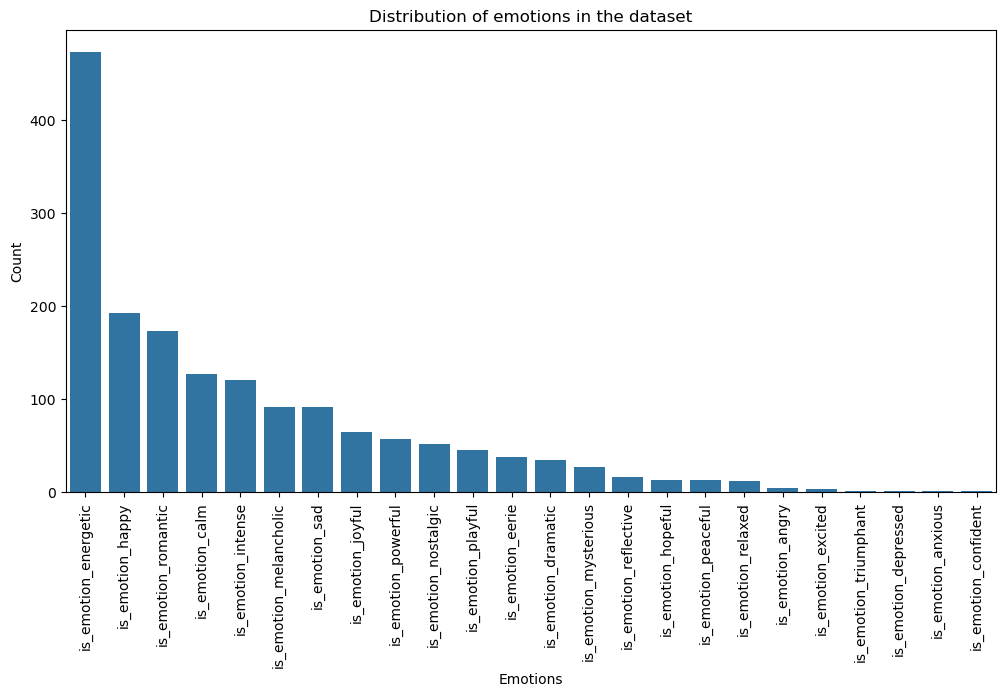

In [9]:
def plot_concept_distribution(df, concept_name):
    concept_counts = df.filter(like=f'is_{concept_name}_').sum().sort_values(ascending=False)
    concept_counts = concept_counts[concept_counts > 0]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=concept_counts.index, y=concept_counts.values)
    plt.title(f'Distribution of {concept_name}s in the dataset')
    plt.xlabel(f'{concept_name.capitalize()}s')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

plot_concept_distribution(df_train_transformed_intrument, "instrument")
plot_concept_distribution(df_train_transformed_emotion, "emotion")

## Zapisanie danych

In [10]:
os.makedirs('data', exist_ok=True)

with open('data/music_genres.txt', 'w') as f:
    for genre in music_genres:
        f.write(f"{genre}\n")
with open('data/instruments.txt', 'w') as f:
    for instrument in instruments:
        f.write(f"{instrument}\n")
with open('data/emotions.txt', 'w') as f:
    for emotion in emotions:
        f.write(f"{emotion}\n")

df_train_transformed_intrument.to_csv('data/music_caps_transformed_instrument.csv', index=False)
df_train_transformed_emotion.to_csv('data/music_caps_transformed_emotion.csv', index=False)